In [12]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
# Check Python version
import sys
print(f"Python version: {sys.version}")

# Check TensorFlow version
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Check Keras version
import keras
print(f"Keras version: {keras.__version__}")

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
TensorFlow version: 2.17.0
Keras version: 3.4.1


In [4]:
#Dosyaların Drive dan alınması
path = r"/content/drive/MyDrive/CorrectedAll"

# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [5]:
# removing faulty images
strings_to_remove = {'F20T1_102Left_CorrectedImage.jpg', 'F20T3-201Left_CorrectedImage.jpg'}

flowers = list(filter(lambda x: x not in strings_to_remove, flowers))

In [5]:
# extracting features from images using Transfer Learning
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):

    #crop images resize and load
    img = load_img(file)
    img = img.crop((0,0,img.size[0],img.size[1]-220))
    img = img.resize((224,224))


    # convert from image to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [45]:
# rigth, left for two-class classification
def get_label(flower):
    if 'ight' in flower:
        return '0'
    elif 'eft' in flower:
        return '1'
    else:
        return '7'

# Create the DataFrame
df = pd.DataFrame({'file': flowers})
df['label'] = df['file'].apply(get_label)

In [51]:
# assigning Labels to Images
def get_label(flower):
    if 'Fresh' in flower:
        return '0'
    elif 'F20T1' in flower:
        return '1'
    elif 'F20T2' in flower:
        return '1'
    elif 'F20T3' in flower:
        return '1'
    elif 'F60T1' in flower:
        return '2'
    elif 'F60-T1' in flower:
        return '2'
    elif 'F60T2' in flower:
        return '2'
    elif 'F60T3' in flower:
        return '2'
    else:
        return '7'

# create the DataFrame
df = pd.DataFrame({'file': flowers})
df['label'] = df['file'].apply(get_label)

In [52]:
labels = df['label'].tolist()

In [53]:
# Count the number of elements in each class
class_counts = df['label'].value_counts()

print(class_counts)

label
1    46
2    45
0    32
Name: count, dtype: int64


In [9]:
# extracting features from images using Transfer Learning
data = {}

for flower in flowers:
  feat = extract_features(flower,model)
  data[flower] = feat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━

In [10]:
# put the extracted features together in an array
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))

feat = feat.reshape(-1,4096)

In [54]:
# obtaining PCA components
pca = PCA(n_components=3, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

labels_array = np.array(labels)

# to be used when any class needs to be removed
indices_to_keep = labels_array != '7'

filtered_features = x[indices_to_keep]
labels = labels_array[indices_to_keep]

In [55]:
filtered_features.shape

(123, 3)

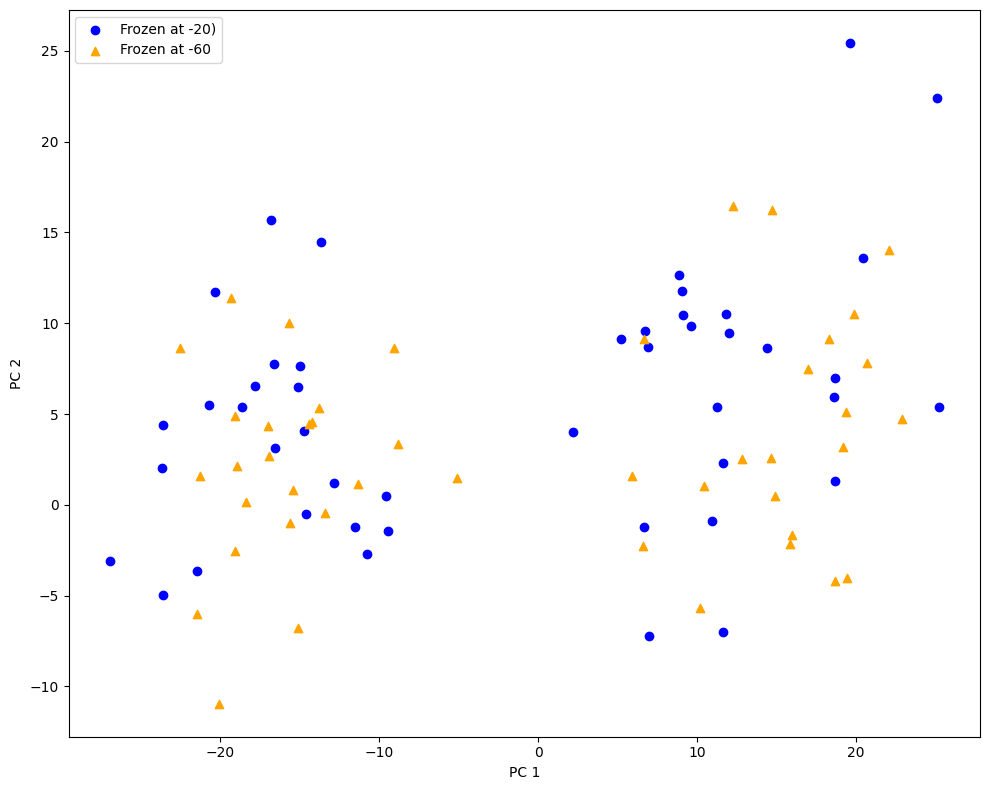

In [35]:
import matplotlib.pyplot as plt

# Extract x, y coordinates from features
x1 = filtered_features[:, 0]
y = filtered_features[:, 1]

# Define custom labels, colors, and markers for each category
custom_label_names = ["Frozen at -20", "Frozen at -60"]
#custom_label_names = ["Fish Right Side", "Fish Left Side"]
custom_colors = ["blue", "orange"]
custom_markers = ["o", "^"]

# Create the figure for a single plot
plt.figure(figsize=(10, 8))

# Plot data for each label
for label, custom_name, color, marker in zip(sorted(set(labels)), custom_label_names, custom_colors, custom_markers):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(x1[indices], y[indices], label=custom_name, color=color, marker=marker)

# Set axis labels and legend
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
file_name = '/content/scatter_plots_Frozen20_Frozen60.jpeg'
plt.savefig(file_name, format='jpeg', dpi=800)

# Show the plot
plt.show()


In [50]:
#2 class right left classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder

# Assuming x_train, y_train are available from the previous code

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
x_train, x_test, y_train_cat, y_test = train_test_split(feat, y_train_categorical, test_size=0.2, random_state=42)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=42)


# Build the neural network model
model = Sequential()
# pca 3 ile yapılınca alınan sonuç için
#model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(64, input_dim=4096, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "/content/drive/MyDrive/CorrectedAll/Model_Weightes/Right_Left.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])

model.load_weights("/content/drive/MyDrive/CorrectedAll/Model_Weightes/Right_Left.keras")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.4272 - loss: 0.7210 - val_accuracy: 0.4800 - val_loss: 0.6718
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7517 - loss: 0.5427 - val_accuracy: 0.6000 - val_loss: 0.6046
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8436 - loss: 0.4226 - val_accuracy: 0.6400 - val_loss: 0.7233
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8387 - loss: 0.4157 - val_accuracy: 0.7600 - val_loss: 0.4421
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8387 - loss: 0.2698 - val_accuracy: 0.7600 - val_loss: 0.3499
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9414 - loss: 0.1586 - val_accuracy: 0.8800 - val_loss: 0.2672
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9560 - loss: 0.0977 - val_accuracy: 0.9200 - val_loss: 0.1799
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9892 - loss: 0.0556 - val_accuracy: 0.9600 - val_loss: 0.1466
Epo

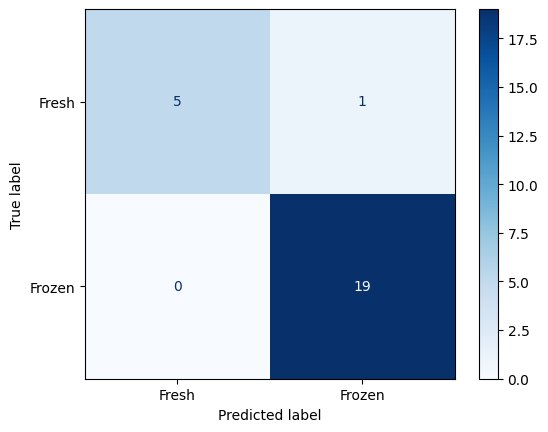

In [ ]:
# creating confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fresh", "Frozen"]

cm = confusion_matrix(y_val_labels_original, predicted_labels_original)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [57]:
# 3 class classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
x_train, x_test, y_train_cat, y_test = train_test_split(feat, y_train_categorical, test_size=0.2, random_state=42)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=42)

# Build the neural network model
model = Sequential()
# Classification with L a b values
#model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(64, input_dim=4096, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


checkpoint_path = "/content/drive/MyDrive/CorrectedAll/Model_Weightes/Fresh_Frozen20_Frozen60.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])


model.load_weights("/content/drive/MyDrive/CorrectedAll/Model_Weightes/Fresh_Frozen20_Frozen60.keras")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.2923 - loss: 1.4186 - val_accuracy: 0.4000 - val_loss: 1.0592
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3001 - loss: 1.2712 - val_accuracy: 0.4000 - val_loss: 1.0987
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4418 - loss: 1.1300 - val_accuracy: 0.3600 - val_loss: 1.0610
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4252 - loss: 1.1224 - val_accuracy: 0.4400 - val_loss: 1.0628
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3813 - loss: 1.1754 - val_accuracy: 0.4800 - val_loss: 1.0724
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2679 - loss: 1.2037 - val_accuracy: 0.4800 - val_loss: 1.0180
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4760 - loss: 1.0264 - val_accuracy: 0.5600 - val_loss: 0.9806
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3304 - loss: 1.1634 - val_accuracy: 0.3600 - val_loss: 1.0692
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Accuracy: 0.88
Precision: 0.91
Recall: 0.88
F1 Score: 0.8747252747252747


In [ ]:
# Predict on the test data
model.load_weights("/content/drive/MyDrive/CorrectedAll/3Class_best_model_with_testdata84.h5")

predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 0s 24ms/step
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


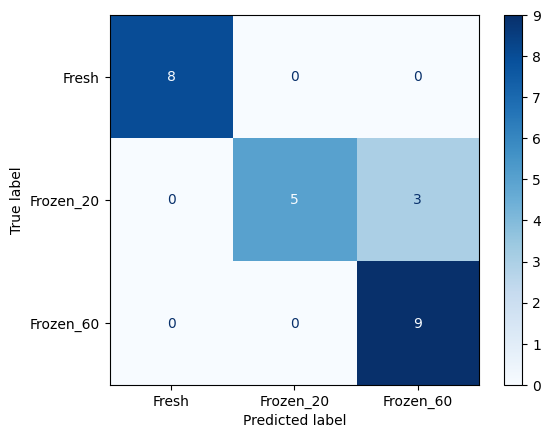

In [58]:
# creating confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fresh", "Frozen_20", "Frozen_60"]

cm = confusion_matrix(y_val_labels_original, predicted_labels_original)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

**Classification using L a b values**


1.   Fresh vs Frozen classification
2.   Right vs Left classification
3.   3 class classification

Same models are used for classification with L a b values. First layer adjusted for 3 features "model.add(Dense(64, input_dim=3, activation='relu'))"








In [3]:
df = pd.read_excel('/content/drive/MyDrive/FishQuality_images/LensEyeData Analysis.xlsx', sheet_name='FreshF20F60')
display(df)

,Unnamed: 0,User area,Avg L,Avg a*,Avg b*,DeltaS,DeltaI
0,F20-102 RİGHT FRESH,193.14,61.45,23.44,16.66,9.86,30.04
1,F20-103 Left FRESH\t,188.98,60.74,23.06,16.14,10.86,34.29
2,F20-202 Left FRESH\t,224.40,61.21,22.18,15.29,10.16,31.15
3,F20-203 RİGHT FRESH,218.85,63.06,20.89,14.68,NaN,NaN
4,F20-302 RİGHT FRESH,201.59,60.15,22.57,15.06,8.93,25.23
...,...,...,...,...,...,...,...
123,F60T3-602 Right THIRD,183.13,55.54,20.66,13.75,9.92,31.44
124,F60T3-702 Left THIRD,198.31,52.54,23.07,14.15,9.50,28.36
125,F60T3-702 Right THIRD,203.91,54.11,21.05,13.69,11.12,35.28
126,F60T3-802 Left THIRD,209.38,56.50,24.76,15.56,9.40,27.85


In [4]:
# unmeasured examples that are not included in the picture examples
df = df[df['Unnamed: 0'] != 'F60T1-302 Left FIRST']
df = df[df['Unnamed: 0'] != 'F60T1-302 Right FIRST']
df = df[df['Unnamed: 0'] != 'F60T1-802 Right FIRST']

#examples in the images with missing L value
df = df[df['Unnamed: 0'] != 'F20T1-102 Left FIRST']
df = df[df['Unnamed: 0'] != 'F20T3-202 Left THIRD']

In [13]:
# 1- Fresh vs Frozen classification for L a b
search_string = 'fresh'
Fresh_df = df[df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]

Frozen_df = df.drop(Fresh_df.index)

selected_columns = ['Avg L', 'Avg a*', 'Avg b*']
Fresh_array = Fresh_df[selected_columns].to_numpy()
Frozen_array = Frozen_df[selected_columns].to_numpy()

print(Fresh_array.shape)
print(Frozen_array.shape)

X = np.vstack((Fresh_array, Frozen_array))
label1 = np.zeros(len(Fresh_array))
label2 = np.ones(len(Frozen_array))
Y = np.hstack((label1, label2))
X = X.astype(np.float32)

(32, 3)
(91, 3)


In [6]:
# 2- Right vs Left classification for L a b
search_string = 'ight'
Right_df = df[df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]

Left_df = df.drop(Right_df.index)

selected_columns = ['Avg L', 'Avg a*', 'Avg b*']
Right_array = Right_df[selected_columns].to_numpy()
Left_array = Left_df[selected_columns].to_numpy()

print(Right_array.shape)
print(Left_array.shape)
X = np.vstack((Right_array, Left_array))
label1 = np.zeros(len(Right_array))
label2 = np.ones(len(Left_array))
Y = np.hstack((label1, label2))
X = X.astype(np.float32)

(62, 3)
(61, 3)


In [36]:
# 3 class classification with L a b values
search_string = 'F20'
F20_df = Frozen_df[Frozen_df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]
F60_df = Frozen_df.drop(F20_df.index)
F20_array = F20_df[selected_columns].to_numpy()
F60_array = F60_df[selected_columns].to_numpy()
X = np.vstack((Fresh_array, F20_array, F60_array))
label1 = np.zeros(len(Fresh_array))
label2 = np.ones(len(F20_array))
label3 = np.full(len(F60_array), 2)
Y = np.hstack((label1, label2, label3))
X = X.astype(np.float32)

In [17]:
# 2 class classification with L a b values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
x_train, x_test, y_train_cat, y_test = train_test_split(X, y_train_categorical, test_size=0.2, random_state=42)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=42)


# Build the neural network model
model = Sequential()
# pca 3 ile yapılınca alınan sonuç için
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "/content/drive/MyDrive/CorrectedAll/Model_Weightes/Right_Left_L_a_b.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])

model.load_weights("/content/drive/MyDrive/CorrectedAll/Model_Weightes/Right_Left_L_a_b.keras")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

# Initialize a Keras AUC metric
auc_metric = tf.keras.metrics.AUC(name='auc', multi_label=True)

# Update the AUC metric with true labels and predicted probabilities
auc_metric.update_state(y_test, predicted_probabilities)
auc = auc_metric.result().numpy()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC (Keras):", auc)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.4526 - loss: 1.8751 - val_accuracy: 0.5600 - val_loss: 1.0748
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4565 - loss: 1.2804 - val_accuracy: 0.5600 - val_loss: 0.7965
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4643 - loss: 0.8954 - val_accuracy: 0.5200 - val_loss: 0.6930
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5112 - loss: 0.7071 - val_accuracy: 0.4400 - val_loss: 0.8226
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5513 - loss: 0.7327 - val_accuracy: 0.4400 - val_loss: 0.8408
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5474 - loss: 0.7392 - val_accuracy: 0.4400 - val_loss: 0.7855
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5943 - loss: 0.6678 - val_accuracy: 0.4400 - val_loss: 0.7069
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5259 - loss: 0.6903 - val_accuracy: 0.5600 - val_loss: 0.6889
Epo

Accuracy: 0.52
Precision: 0.4807017543859649
Recall: 0.52
F1 Score: 0.4882352941176471
AUC (Keras): 0.41999996


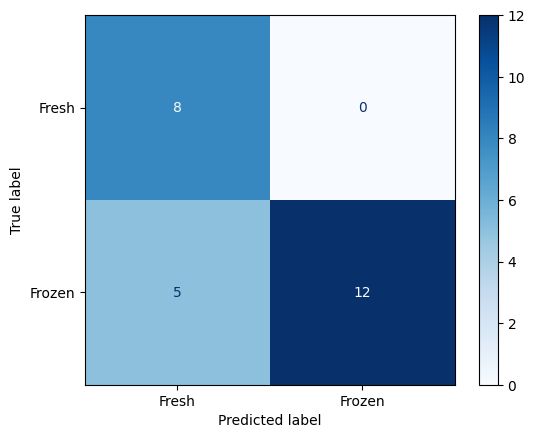

In [80]:
# creating confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fresh", "Frozen"]

cm = confusion_matrix(y_val_labels_original, predicted_labels_original)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [38]:
# 3 class classification L_a_b
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
x_train, x_test, y_train_cat, y_test = train_test_split(X, y_train_categorical, test_size=0.2, random_state=42)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=42)

# Build the neural network model
model = Sequential()
# Classification with L a b values
model.add(Dense(64, input_dim=3, activation='relu'))
#model.add(Dense(64, input_dim=4096, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


checkpoint_path = "/content/drive/MyDrive/CorrectedAll/Model_Weightes/Fresh_Frozen20_Frozen60_L_a_b.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])


model.load_weights("/content/drive/MyDrive/CorrectedAll/Model_Weightes/Fresh_Frozen20_Frozen60_L_a_b.keras")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

# Initialize a Keras AUC metric
auc_metric = tf.keras.metrics.AUC(name='auc', multi_label=True)

# Update the AUC metric with true labels and predicted probabilities
auc_metric.update_state(y_test, predicted_probabilities)
auc = auc_metric.result().numpy()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC (Keras):", auc)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.3158 - loss: 3.7906 - val_accuracy: 0.3200 - val_loss: 2.6172
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4105 - loss: 2.4296 - val_accuracy: 0.3200 - val_loss: 1.4762
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3891 - loss: 1.8013 - val_accuracy: 0.2400 - val_loss: 1.1546
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2982 - loss: 1.8427 - val_accuracy: 0.2800 - val_loss: 1.1883
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3431 - loss: 1.7694 - val_accuracy: 0.2800 - val_loss: 1.2384
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3910 - loss: 1.4918 - val_accuracy: 0.2800 - val_loss: 1.2378
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3256 - loss: 1.6644 - val_accuracy: 0.2000 - val_loss: 1.1940
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2815 - loss: 1.5320 - val_accuracy: 0.1200 - val_loss: 1.1625
Epo